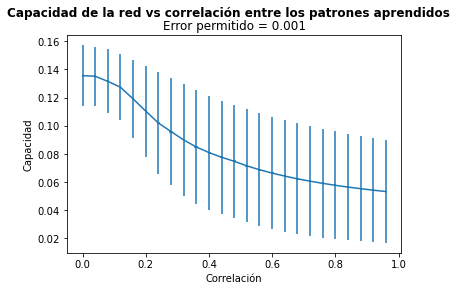

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def signo(vector):
    return np.where(vector >= 0, 1, -1)

def hopfield(pattern, weights):
    input_state = np.where(pattern.flatten() >= 0, 1, -1)
    return signo(np.dot(input_state, weights))

def entrenar_hopfield(patrones):
    matriz_patrones = np.where(np.array([patron.flatten() for patron in patrones]) >= 0, 1, -1)
    pesos = np.dot(matriz_patrones.T, matriz_patrones)
    np.fill_diagonal(pesos, 0)
    return pesos

def correlacionar_patron(patron, num_elementos):
    indices = np.random.choice(len(patron), len(patron) - num_elementos, replace=False)
    patron_correlacionado = patron.copy()
    patron_correlacionado[indices] *= -1
    return patron_correlacionado

def simular_hopfield(tamano, error_permitido, corr_num, iteraciones):
    lista_capacidades = []
    tabla_resultados = {}
    for corr_indice in corr_num:
        medias_correlacion = []
        tabla_resultados[corr_indice] = {}
        for _ in range(iteraciones):
            error_actual = 0
            patrones = []
            correlaciones = []
            patron_inicial = 2 * np.random.binomial(1, 0.5, tamano * tamano) - 1
            patrones.append(patron_inicial.reshape(tamano, tamano))
            while error_actual < error_permitido:
                pesos = entrenar_hopfield(patrones)
                num_errores = sum(tamano * tamano - np.sum(pat == hopfield(pat, pesos).reshape(tamano, tamano)) for pat in patrones)
                error_actual = num_errores / ((tamano * tamano) * len(patrones))
                patron_correlacionado = correlacionar_patron(patron_inicial, corr_indice)
                patrones.append(patron_correlacionado.reshape(tamano, tamano))
                correlaciones.append(np.corrcoef(patron_inicial, patron_correlacionado)[0, 1])
            capacidad = (len(patrones) - 1) / (tamano * tamano)
            lista_capacidades.append(capacidad)
            medias_correlacion.append(np.mean(correlaciones))
        tabla_resultados[corr_indice]['Media Capacidad'] = np.mean(lista_capacidades)
        tabla_resultados[corr_indice]['Desviación Capacidad'] = np.std(lista_capacidades)
        tabla_resultados[corr_indice]['Media Correlación'] = np.mean(medias_correlacion)
        tabla_resultados[corr_indice]['Desviación Correlación'] = np.std(medias_correlacion)
    return pd.DataFrame(tabla_resultados)

def graficar_resultados(datos, error_permitido):
    fig, ax = plt.subplots()
    fig.suptitle('Capacidad de la red vs correlación entre los patrones aprendidos', fontweight="bold")
    ax.set_title(f'Error permitido = {error_permitido}')
    ax.set_ylabel('Capacidad')
    ax.set_xlabel('Correlación')
    ax.errorbar(x=datos['Media Correlación'], y=datos['Media Capacidad'], yerr=datos['Desviación Capacidad'],
                xerr=datos['Desviación Correlación'])
    plt.show()

# Parámetros
error_permitido = 0.001
tamano_patron = 10
corr_num = range(50, 100, 2)
iteraciones = 100

# Simulación y Ploteo
tabla_resultados = simular_hopfield(tamano_patron, error_permitido, corr_num, iteraciones)
datos = {
    'Media Capacidad': np.array([tabla_resultados[m]['Media Capacidad'] for m in corr_num]),
    'Desviación Capacidad': np.array([tabla_resultados[m]['Desviación Capacidad'] for m in corr_num]),
    'Media Correlación': np.array([tabla_resultados[m]['Media Correlación'] for m in corr_num]),
    'Desviación Correlación': np.array([tabla_resultados[m]['Desviación Correlación'] for m in corr_num])
}

graficar_resultados(datos, error_permitido)